# K-Means Clustering

## Importing the libraries

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [9]:
dataset = pd.read_csv("data/Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Using the elbow method to find the optimal number of clusters

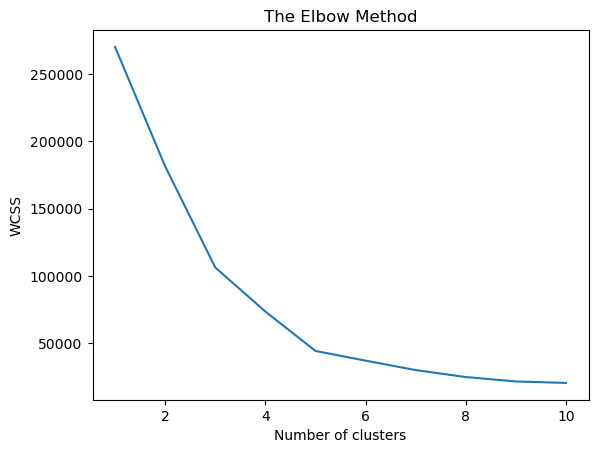

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

### **Result**: Maximum change occurs with 5 clusters.

## Training the K-Means model on the dataset

In [12]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

## Plot the distribution of clusters

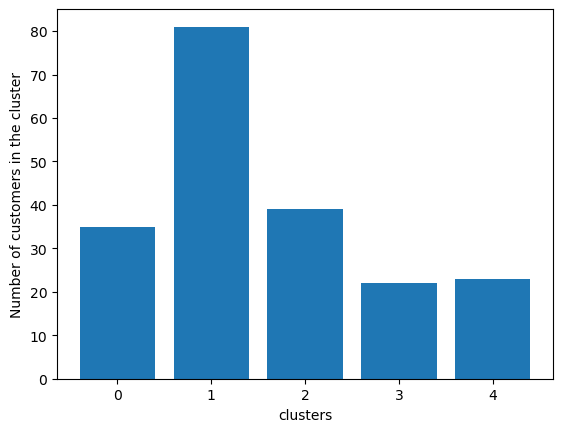

In [13]:
clusters = pd.Series(y_kmeans).value_counts()
plt.bar(clusters.index, clusters.values)
plt.xlabel("clusters")
plt.ylabel("Number of customers in the cluster")
plt.show()

## Visualising the clusters

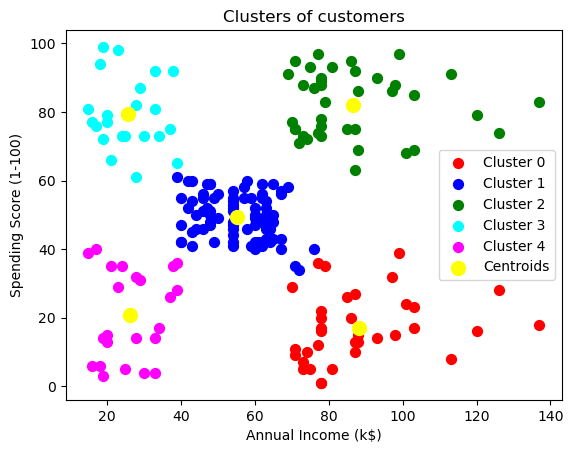

In [14]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c="red", label="Cluster 0")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c="blue", label="Cluster 1")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c="green", label="Cluster 2")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c="cyan", label="Cluster 3")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=50, c="magenta", label="Cluster 4")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="yellow", label="Centroids")
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()